In [1]:
import pandas as pd
import datetime
import numpy as np
import sklearn as sk
import re

In [2]:
data = pd.read_csv('training_set.csv', encoding = "ISO-8859-1")

In [3]:
data.shape

(7766, 5)

In [4]:
import pandas_profiling

In [5]:
profile1 = pandas_profiling.ProfileReport(data)
profile1.to_file("BA_Round1.html")

------- 

In [6]:
data['Description'].isna().sum() 

14

There are 14 no description content. 

In [7]:
data['Description']= data.Description.fillna('')

In [8]:
data['Len_Desc'] = data['Description'].str.len()

In [9]:
data['Tagged_Count'] = data['Description'].str.count('@')

In [10]:
data.head()

,Engagements,Followers at Posting,Created,Type,Description,Len_Desc,Tagged_Count
0,502093,36984682,2019-05-21 23:30:51 EDT,Video,The @raptors bench trio of @sergeibaka @norman...,95,4
1,603380,36984682,2019-05-21 22:53:33 EDT,Video,@kyle_lowry7 pulls from deep for the @raptors ...,64,2
2,603380,36984682,2019-05-21 22:19:58 EDT,Video,@k_mid22 with some english on the @bucks dime!,46,2
3,725100,36984682,2019-05-21 22:02:41 EDT,Video,Kawhi punches it home with the left on TNT!,43,0
4,661446,36984682,2019-05-21 20:47:49 EDT,Video,@giannis_an34 goes baseline early to rock the ...,57,1


In [11]:
data.isna().sum() 

Engagements             0
Followers at Posting    0
Created                 0
Type                    0
Description             0
Len_Desc                0
Tagged_Count            0
dtype: int64

In [12]:
data= data.rename(columns = {"Followers at Posting" : "NBA_Follower_Count"})

In [13]:
data.dtypes

Engagements            int64
NBA_Follower_Count     int64
Created               object
Type                  object
Description           object
Len_Desc               int64
Tagged_Count           int64
dtype: object

We have now replaced all the null values with empty strings. We have also added Length of description and tagged count. We have also editted the name of follower variable for ease of use in code.

**Questions**
- What is the ?? 
- What are some other possible features


Question 1: 
I believe the ?? represent emojis. 
Ex: 
- 💥 @meyersleonard11! 💥 (📺: ESPN) vs ?? @meyersleonard11! ?? (??: ESPN)
- 😤 KAWHI! 😤 vs ?? KAWHI! ??
- 🖐🏽 Suction Cups! 🖐🏽 vs ???? Suction Cups! ????
- 🏀🏆🌟 Presenting the finalists for the six awards that honor the top performers from the 2018-19 regular season at the 2019 #NBAAwards (9:00pm/et June 24th @nbaontnt)!  vs ?????? Presenting the finalists for the six awards that honor the top performers from the 2018-19 regular season at the 2019 #NBAAwards (9:00pm/et June 24th @nbaontnt)!

Generally each 2?'s represent one emoji with the exception of the suction cups

**Initial EDA**

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

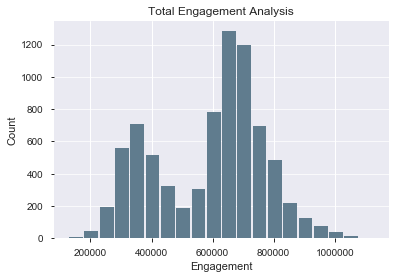

In [15]:
data.Engagements.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Total Engagement Analysis')
plt.xlabel('Engagement')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)
plt.show()

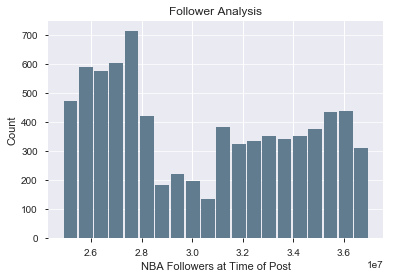

In [16]:
data.NBA_Follower_Count.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Follower Analysis')
plt.xlabel('NBA Followers at Time of Post')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)
plt.show()

Data from Engagements and Followers seem to be bimodal in nature. 

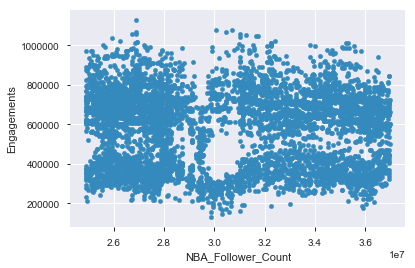

In [17]:
data.plot.scatter(x="NBA_Follower_Count", y="Engagements");

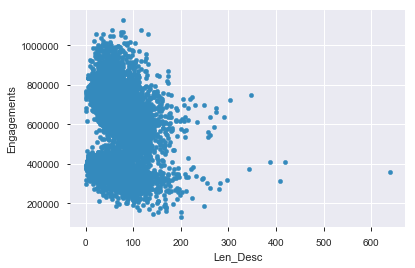

In [18]:
data.plot.scatter(x="Len_Desc", y="Engagements");

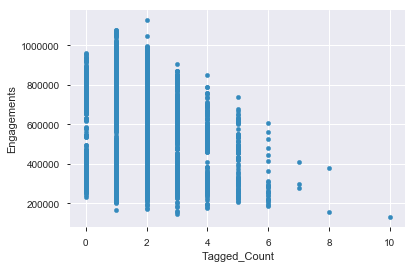

In [19]:
data.plot.scatter(x="Tagged_Count", y="Engagements");

Unfortunately, none of our quantitative variables seem to have a linear relationship with engagements. 

from pandas.plotting import scatter_matrix #scatterplot of all the combinations of variable

sm = scatter_matrix(data, alpha=0.2, figsize=(6, 6), diagonal='kde');

#Code to produce scatter matrix but viewability is low. 

In [20]:
import seaborn as sns

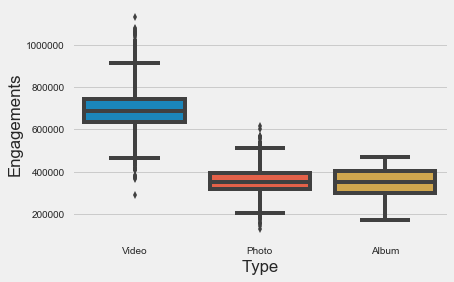

In [21]:
plt.style.use('fivethirtyeight')
  
sns.boxplot(x = 'Type', y = 'Engagements', data = data)

However, it seems that engagement overall is far more on video content than photo or album as the entire boxplot of video is above photo and album.

Below will be code to turn the date time to week of day. 

**Other date feature creation**
- Before and after playoffs
- Before and after allstar

In [22]:
data['DayOfWeek']= pd.to_datetime(data['Created']).dt.day_name()

In [23]:
data.head()

,Engagements,NBA_Follower_Count,Created,Type,Description,Len_Desc,Tagged_Count,DayOfWeek
0,502093,36984682,2019-05-21 23:30:51 EDT,Video,The @raptors bench trio of @sergeibaka @norman...,95,4,Wednesday
1,603380,36984682,2019-05-21 22:53:33 EDT,Video,@kyle_lowry7 pulls from deep for the @raptors ...,64,2,Wednesday
2,603380,36984682,2019-05-21 22:19:58 EDT,Video,@k_mid22 with some english on the @bucks dime!,46,2,Wednesday
3,725100,36984682,2019-05-21 22:02:41 EDT,Video,Kawhi punches it home with the left on TNT!,43,0,Wednesday
4,661446,36984682,2019-05-21 20:47:49 EDT,Video,@giannis_an34 goes baseline early to rock the ...,57,1,Wednesday


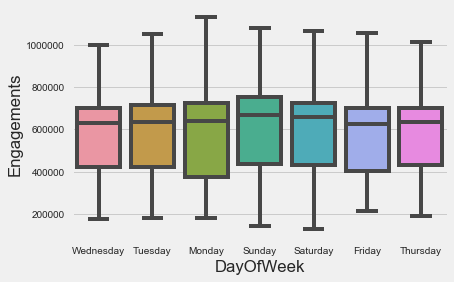

In [24]:
sns.boxplot(x = 'DayOfWeek', y = 'Engagements', data = data)

It seems Sunday and Saturday have higher median engagements, but overall there doesn't seem to be much difference between the week days.

In [25]:
data['Created']= pd.to_datetime(data['Created'])

In [26]:
data[['Created']]

,Created
0,2019-05-22 03:30:51
1,2019-05-22 02:53:33
2,2019-05-22 02:19:58
3,2019-05-22 02:02:41
4,2019-05-22 00:47:49
5,2019-05-21 18:02:32
6,2019-05-21 16:30:53
7,2019-05-21 12:59:02
8,2019-05-21 04:48:16
9,2019-05-21 04:38:18


In [27]:
def playoffDate(date): 
    if date > pd.Timestamp('2019-4-13'): 
        return 1 
    else: 
        return 0

In [28]:
data['playOffDate']= data.Created.map(lambda a: playoffDate(a.tz_localize(None)))

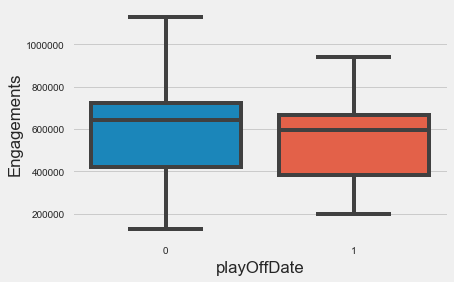

In [29]:
sns.boxplot(x = 'playOffDate', y = 'Engagements', data = data)

While the median of the non playoff date seems to be higher, this doesn't suggest a strong factor. 

In [30]:
data['month'] = data.Created.map(lambda a: a.month)

In [31]:
data.head()

,Engagements,NBA_Follower_Count,Created,Type,Description,Len_Desc,Tagged_Count,DayOfWeek,playOffDate,month
0,502093,36984682,2019-05-22 03:30:51,Video,The @raptors bench trio of @sergeibaka @norman...,95,4,Wednesday,1,5
1,603380,36984682,2019-05-22 02:53:33,Video,@kyle_lowry7 pulls from deep for the @raptors ...,64,2,Wednesday,1,5
2,603380,36984682,2019-05-22 02:19:58,Video,@k_mid22 with some english on the @bucks dime!,46,2,Wednesday,1,5
3,725100,36984682,2019-05-22 02:02:41,Video,Kawhi punches it home with the left on TNT!,43,0,Wednesday,1,5
4,661446,36984682,2019-05-22 00:47:49,Video,@giannis_an34 goes baseline early to rock the ...,57,1,Wednesday,1,5


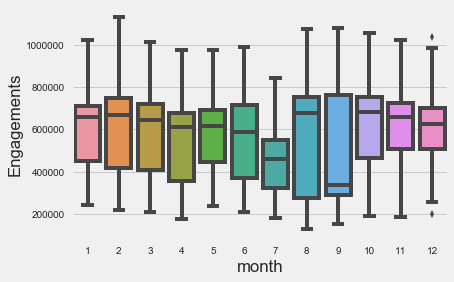

In [32]:
sns.boxplot(x = 'month', y = 'Engagements', data = data)

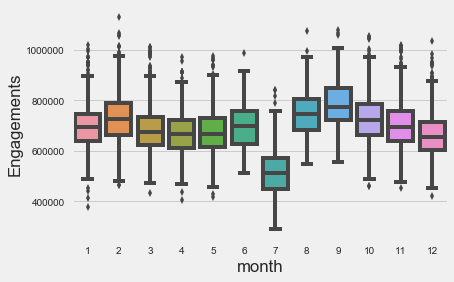

In [33]:
sns.boxplot(x = 'month', y = 'Engagements', data = data[data['Type'] == 'Video'])

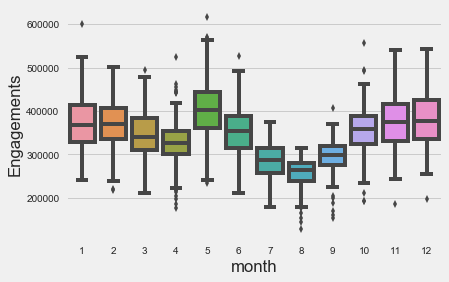

In [34]:
sns.boxplot(x = 'month', y = 'Engagements', data = data[data['Type'] != 'Video'])

It seems that Video vs other media types have different engagements throughout the year esp in August

In [35]:
data.head()


,Engagements,NBA_Follower_Count,Created,Type,Description,Len_Desc,Tagged_Count,DayOfWeek,playOffDate,month
0,502093,36984682,2019-05-22 03:30:51,Video,The @raptors bench trio of @sergeibaka @norman...,95,4,Wednesday,1,5
1,603380,36984682,2019-05-22 02:53:33,Video,@kyle_lowry7 pulls from deep for the @raptors ...,64,2,Wednesday,1,5
2,603380,36984682,2019-05-22 02:19:58,Video,@k_mid22 with some english on the @bucks dime!,46,2,Wednesday,1,5
3,725100,36984682,2019-05-22 02:02:41,Video,Kawhi punches it home with the left on TNT!,43,0,Wednesday,1,5
4,661446,36984682,2019-05-22 00:47:49,Video,@giannis_an34 goes baseline early to rock the ...,57,1,Wednesday,1,5


In [36]:
data['hour'] = data.Created.map(lambda a: a.hour)

In [37]:
data.head()

,Engagements,NBA_Follower_Count,Created,Type,Description,Len_Desc,Tagged_Count,DayOfWeek,playOffDate,month,hour
0,502093,36984682,2019-05-22 03:30:51,Video,The @raptors bench trio of @sergeibaka @norman...,95,4,Wednesday,1,5,3
1,603380,36984682,2019-05-22 02:53:33,Video,@kyle_lowry7 pulls from deep for the @raptors ...,64,2,Wednesday,1,5,2
2,603380,36984682,2019-05-22 02:19:58,Video,@k_mid22 with some english on the @bucks dime!,46,2,Wednesday,1,5,2
3,725100,36984682,2019-05-22 02:02:41,Video,Kawhi punches it home with the left on TNT!,43,0,Wednesday,1,5,2
4,661446,36984682,2019-05-22 00:47:49,Video,@giannis_an34 goes baseline early to rock the ...,57,1,Wednesday,1,5,0


In [38]:
data.isna().sum()

Engagements           0
NBA_Follower_Count    0
Created               0
Type                  0
Description           0
Len_Desc              0
Tagged_Count          0
DayOfWeek             0
playOffDate           0
month                 0
hour                  0
dtype: int64

In [39]:
def timeOfDay(hour): 
    if hour < 6: 
        return 'Night' 
    elif hour <12: 
        return 'Morning'
    elif hour <18: 
        return 'Afternoon'
    else:
        return'Evening'

In [40]:
data['timeOfDay']= data.hour.map(lambda a: timeOfDay(a))

In [41]:
data.head()

,Engagements,NBA_Follower_Count,Created,Type,Description,Len_Desc,Tagged_Count,DayOfWeek,playOffDate,month,hour,timeOfDay
0,502093,36984682,2019-05-22 03:30:51,Video,The @raptors bench trio of @sergeibaka @norman...,95,4,Wednesday,1,5,3,Night
1,603380,36984682,2019-05-22 02:53:33,Video,@kyle_lowry7 pulls from deep for the @raptors ...,64,2,Wednesday,1,5,2,Night
2,603380,36984682,2019-05-22 02:19:58,Video,@k_mid22 with some english on the @bucks dime!,46,2,Wednesday,1,5,2,Night
3,725100,36984682,2019-05-22 02:02:41,Video,Kawhi punches it home with the left on TNT!,43,0,Wednesday,1,5,2,Night
4,661446,36984682,2019-05-22 00:47:49,Video,@giannis_an34 goes baseline early to rock the ...,57,1,Wednesday,1,5,0,Night


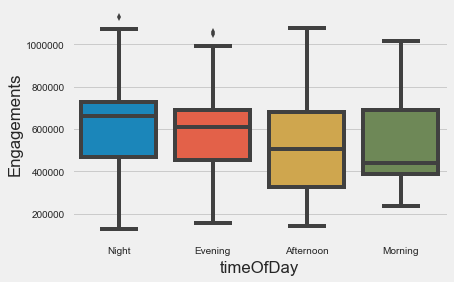

In [42]:
sns.boxplot(x = 'timeOfDay', y = 'Engagements',  data = data)

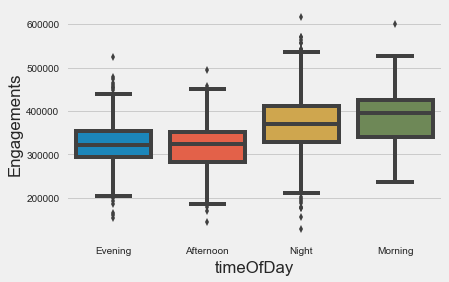

In [43]:
sns.boxplot(x = 'timeOfDay', y = 'Engagements',  data = data[data['Type'] != 'Video'])

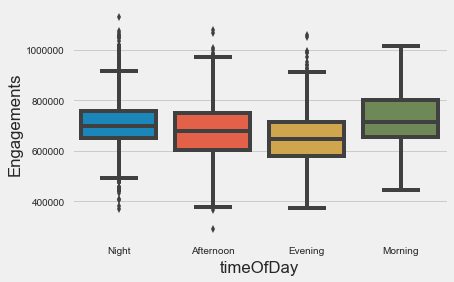

In [44]:
sns.boxplot(x = 'timeOfDay', y = 'Engagements',  data = data[data['Type'] == 'Video'])

At first, it may be tempting to say night has the highest median engagements. It seems once you split the data on video vs non video there are differences in the results. 

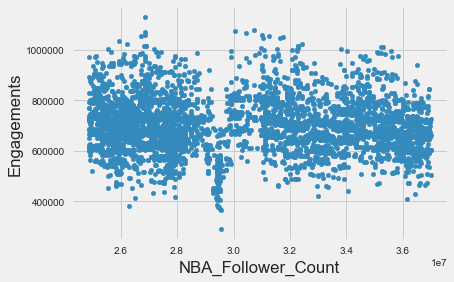

In [45]:
data[data['Type'] == 'Video'].plot.scatter(x="NBA_Follower_Count", y="Engagements");

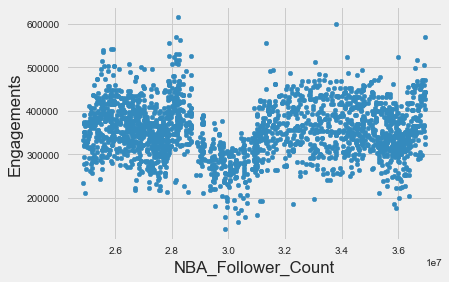

In [46]:
data[data['Type'] != 'Video'].plot.scatter(x="NBA_Follower_Count", y="Engagements");

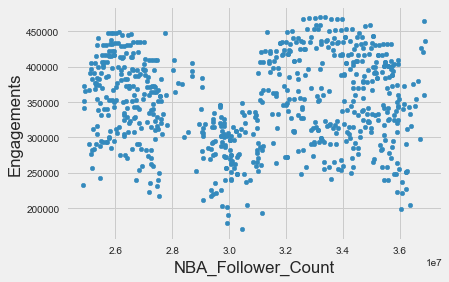

In [47]:
data[data['Type'] == 'Album'].plot.scatter(x="NBA_Follower_Count", y="Engagements");

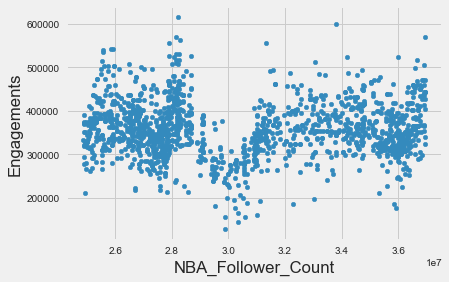

In [48]:
data[data['Type'] == 'Photo'].plot.scatter(x="NBA_Follower_Count", y="Engagements");

In [49]:
data.head()

,Engagements,NBA_Follower_Count,Created,Type,Description,Len_Desc,Tagged_Count,DayOfWeek,playOffDate,month,hour,timeOfDay
0,502093,36984682,2019-05-22 03:30:51,Video,The @raptors bench trio of @sergeibaka @norman...,95,4,Wednesday,1,5,3,Night
1,603380,36984682,2019-05-22 02:53:33,Video,@kyle_lowry7 pulls from deep for the @raptors ...,64,2,Wednesday,1,5,2,Night
2,603380,36984682,2019-05-22 02:19:58,Video,@k_mid22 with some english on the @bucks dime!,46,2,Wednesday,1,5,2,Night
3,725100,36984682,2019-05-22 02:02:41,Video,Kawhi punches it home with the left on TNT!,43,0,Wednesday,1,5,2,Night
4,661446,36984682,2019-05-22 00:47:49,Video,@giannis_an34 goes baseline early to rock the ...,57,1,Wednesday,1,5,0,Night


In [50]:
def proportionOfTarget(caption): 
    #In this case target will be all non normal text
    targetCount = 0
    if not caption: return 0
    lst = caption.split(' ')
    count = len(lst)
    if count == 0: return 0
    for word in lst: 
        if len(word) ==0: continue 
        if word[0] in ['@', '#']: targetCount += 1
        elif '??' in word: targetCount+= 1
    return float(targetCount)/float(count)
    
    

In [51]:
data['propOfSpecialTexts'] = data.Description.map(lambda a: proportionOfTarget(a))

In [52]:
data.head()

,Engagements,NBA_Follower_Count,Created,Type,Description,Len_Desc,Tagged_Count,DayOfWeek,playOffDate,month,hour,timeOfDay,propOfSpecialTexts
0,502093,36984682,2019-05-22 03:30:51,Video,The @raptors bench trio of @sergeibaka @norman...,95,4,Wednesday,1,5,3,Night,0.266667
1,603380,36984682,2019-05-22 02:53:33,Video,@kyle_lowry7 pulls from deep for the @raptors ...,64,2,Wednesday,1,5,2,Night,0.166667
2,603380,36984682,2019-05-22 02:19:58,Video,@k_mid22 with some english on the @bucks dime!,46,2,Wednesday,1,5,2,Night,0.250000
3,725100,36984682,2019-05-22 02:02:41,Video,Kawhi punches it home with the left on TNT!,43,0,Wednesday,1,5,2,Night,0.000000
4,661446,36984682,2019-05-22 00:47:49,Video,@giannis_an34 goes baseline early to rock the ...,57,1,Wednesday,1,5,0,Night,0.100000


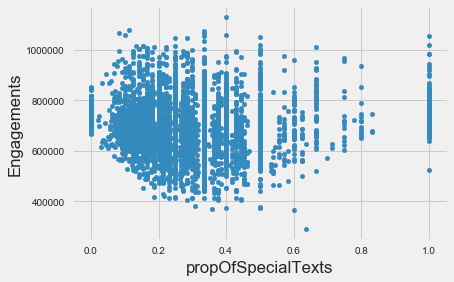

In [53]:
data[data['Type'] == 'Video'].plot.scatter(x="propOfSpecialTexts", y="Engagements");

The new feature of counting how many words were preceeded by emojis, @, and #/ total words was not a good metric

In [54]:
data['shoutouts']= data.Description.map(lambda x: re.findall('@\w*', x))
data.head()

,Engagements,NBA_Follower_Count,Created,Type,Description,Len_Desc,Tagged_Count,DayOfWeek,playOffDate,month,hour,timeOfDay,propOfSpecialTexts,shoutouts
0,502093,36984682,2019-05-22 03:30:51,Video,The @raptors bench trio of @sergeibaka @norman...,95,4,Wednesday,1,5,3,Night,0.266667,"[@raptors, @sergeibaka, @normanpowell4, @fredv..."
1,603380,36984682,2019-05-22 02:53:33,Video,@kyle_lowry7 pulls from deep for the @raptors ...,64,2,Wednesday,1,5,2,Night,0.166667,"[@kyle_lowry7, @raptors]"
2,603380,36984682,2019-05-22 02:19:58,Video,@k_mid22 with some english on the @bucks dime!,46,2,Wednesday,1,5,2,Night,0.250000,"[@k_mid22, @bucks]"
3,725100,36984682,2019-05-22 02:02:41,Video,Kawhi punches it home with the left on TNT!,43,0,Wednesday,1,5,2,Night,0.000000,[]
4,661446,36984682,2019-05-22 00:47:49,Video,@giannis_an34 goes baseline early to rock the ...,57,1,Wednesday,1,5,0,Night,0.100000,[@giannis_an34]


In [55]:
allVals = {}
for listItem in data['shoutouts']:
    for item in listItem:
        if item.lower() not in allVals: allVals[item.lower()] = 0
        allVals[item.lower()] = allVals[item.lower()] + 1
allVals

{'@raptors': 220,
 '@sergeibaka': 13,
 '@normanpowell4': 8,
 '@fredvanvleet': 7,
 '@kyle_lowry7': 45,
 '@k_mid22': 9,
 '@bucks': 197,
 '@giannis_an34': 195,
 '@lukadoncic': 87,
 '@traeyoung': 56,
 '@warriors': 400,
 '@nbastore': 19,
 '@stephencurry30': 234,
 '@nbahistory': 75,
 '@money23green': 41,
 '@trailblazers': 191,
 '@meyersleonard11': 9,
 '@damianlillard': 82,
 '@budweiserusa': 13,
 '@nbaonespn': 151,
 '@kristenledlow': 2,
 '@reggiemillertnt': 2,
 '@pskills43': 19,
 '@nbaontnt': 478,
 '@marcgasol': 12,
 '@youtube': 17,
 '@zachcollins_33': 3,
 '@eneskanter11': 6,
 '@nbagleague': 29,
 '@sdotcurry': 11,
 '@spiceadams': 1,
 '@tristanj22': 1,
 '@jesser': 1,
 '@iamkrislondon': 2,
 '@andre': 30,
 '@flyght5': 4,
 '@jonasjerebko': 3,
 '@jbell': 2,
 '@thebledshow': 11,
 '@magicjohnson': 7,
 '@kenny': 1,
 '@oregonmbb': 1,
 '@sixers': 255,
 '@bensimmons': 163,
 '@joelembiid': 115,
 '@3jmccollum': 34,
 '@nuggets': 158,
 '@thats_g_': 16,
 '@jmglitxh27': 37,
 '@houstonrockets': 318,
 '@klaytho

In [56]:
sorted([(vals,key) for key,vals in allVals.items()], reverse = True)

[(478, '@nbaontnt'),
 (451, '@kingjames'),
 (400, '@warriors'),
 (318, '@houstonrockets'),
 (302, '@celtics'),
 (256, '@cavs'),
 (255, '@sixers'),
 (234, '@stephencurry30'),
 (228, '@lakers'),
 (221, '@jharden13'),
 (220, '@raptors'),
 (216, '@okcthunder'),
 (197, '@bucks'),
 (195, '@giannis_an34'),
 (191, '@trailblazers'),
 (176, '@nbatv'),
 (175, '@russwest44'),
 (163, '@bensimmons'),
 (158, '@nuggets'),
 (151, '@nbaonespn'),
 (151, '@kyrieirving'),
 (128, '@dwyanewade'),
 (123, '@spurs'),
 (118, '@cp3'),
 (115, '@joelembiid'),
 (106, '@utahjazz'),
 (105, '@spidadmitchell'),
 (98, '@pacers'),
 (96, '@miamiheat'),
 (96, '@dallasmavs'),
 (94, '@timberwolves'),
 (88, '@pelicansnba'),
 (87, '@lukadoncic'),
 (82, '@laclippers'),
 (82, '@damianlillard'),
 (77, '@ygtrece'),
 (77, '@nbasummerleague'),
 (75, '@washwizards'),
 (75, '@nbahistory'),
 (75, '@nbaallstar'),
 (74, '@hornets'),
 (70, '@antdavis23'),
 (69, '@jaytatum0'),
 (68, '@easymoneysniper'),
 (67, '@sacramentokings'),
 (67, '@at

In [57]:
mostCommon = set()
for item in allVals:
    if allVals[item] > 50:
        mostCommon.add(item)
mostCommon

{'@antdavis23',
 '@atlhawks',
 '@bensimmons',
 '@brooklynnets',
 '@bucks',
 '@cavs',
 '@celtics',
 '@cp3',
 '@dallasmavs',
 '@damianlillard',
 '@demar_derozan',
 '@detroitpistons',
 '@dwyanewade',
 '@easymoneysniper',
 '@giannis_an34',
 '@hornets',
 '@houstonrockets',
 '@jaytatum0',
 '@jharden13',
 '@joelembiid',
 '@karltowns',
 '@kevindurant',
 '@kingjames',
 '@kyrieirving',
 '@laclippers',
 '@lakers',
 '@lukadoncic',
 '@miamiheat',
 '@nbaallstar',
 '@nbahistory',
 '@nbaonespn',
 '@nbaontnt',
 '@nbasummerleague',
 '@nbatv',
 '@nuggets',
 '@nyknicks',
 '@okcthunder',
 '@orlandomagic',
 '@pacers',
 '@pelicansnba',
 '@raptors',
 '@russwest44',
 '@sacramentokings',
 '@sixers',
 '@spidadmitchell',
 '@spurs',
 '@stephencurry30',
 '@suns',
 '@timberwolves',
 '@traeyoung',
 '@trailblazers',
 '@utahjazz',
 '@vicoladipo',
 '@warriors',
 '@washwizards',
 '@ygtrece',
 '@zo'}

In [58]:
avgEng = {}
for listItem in mostCommon:
    temp = 0
    count = 0
    for index, row in data.iterrows():
        if listItem in row["shoutouts"]:
            temp = temp + row["Engagements"]
            count = count + 1
    avgEng[listItem] = temp / count
avgEng

{'@raptors': 484298.49528301886,
 '@nbahistory': 532481.0333333333,
 '@kingjames': 780689.7026378897,
 '@jharden13': 642639.3640552995,
 '@kevindurant': 593913.7142857143,
 '@nbaontnt': 583490.7321814254,
 '@sixers': 487791.40562249,
 '@pacers': 504540.2173913043,
 '@zo': 647635.6727272727,
 '@trailblazers': 483836.962962963,
 '@sacramentokings': 502015.5625,
 '@bensimmons': 573052.5527950311,
 '@lakers': 583342.5787037037,
 '@ygtrece': 601942.5131578947,
 '@timberwolves': 541104.4827586206,
 '@nbasummerleague': 416573.64864864864,
 '@dwyanewade': 634324.7338709678,
 '@nyknicks': 552929.6666666666,
 '@joelembiid': 602360.7719298246,
 '@detroitpistons': 463567.1346153846,
 '@dallasmavs': 499154.94736842107,
 '@nuggets': 457663.7834394904,
 '@kyrieirving': 805191.34,
 '@vicoladipo': 611528.6290322581,
 '@warriors': 573011.3969072165,
 '@spidadmitchell': 643335.1523809524,
 '@miamiheat': 504508.72043010755,
 '@celtics': 574928.6983050847,
 '@washwizards': 510377.61643835617,
 '@okcthunder

In [59]:
sorted([(vals,key) for key,vals in avgEng.items()], reverse = True)

[(805191.34, '@kyrieirving'),
 (780689.7026378897, '@kingjames'),
 (705496.8, '@stephencurry30'),
 (647635.6727272727, '@zo'),
 (646678.3676470588, '@easymoneysniper'),
 (643335.1523809524, '@spidadmitchell'),
 (642639.3640552995, '@jharden13'),
 (639320.4782608695, '@jaytatum0'),
 (634324.7338709678, '@dwyanewade'),
 (633238.0857142857, '@antdavis23'),
 (628543.8341968912, '@giannis_an34'),
 (628295.16, '@karltowns'),
 (627372.8073394495, '@cp3'),
 (622783.913580247, '@damianlillard'),
 (616215.7321428572, '@traeyoung'),
 (611528.6290322581, '@vicoladipo'),
 (603939.3793103448, '@lukadoncic'),
 (602360.7719298246, '@joelembiid'),
 (601942.5131578947, '@ygtrece'),
 (593913.7142857143, '@kevindurant'),
 (583490.7321814254, '@nbaontnt'),
 (583342.5787037037, '@lakers'),
 (582782.3773584906, '@demar_derozan'),
 (577480.7068273092, '@cavs'),
 (574928.6983050847, '@celtics'),
 (574580.9823529412, '@nbatv'),
 (573052.5527950311, '@bensimmons'),
 (573011.3969072165, '@warriors'),
 (552929.666

In [60]:
def tagLevel(tags):
    highest = 0
    for tag in tags:
        if tag in avgEng and avgEng[tag] > highest:
            highest = avgEng[tag]
    if highest == 0:
        return 'None'
    elif highest < 500000:
        return 'Low'
    elif highest < 600000:
        return 'Mid'
    else:
        return 'High'

In [61]:
data['TagLevel'] = data.shoutouts.map(lambda a: tagLevel(a))
data.head()

,Engagements,NBA_Follower_Count,Created,Type,Description,Len_Desc,Tagged_Count,DayOfWeek,playOffDate,month,hour,timeOfDay,propOfSpecialTexts,shoutouts,TagLevel
0,502093,36984682,2019-05-22 03:30:51,Video,The @raptors bench trio of @sergeibaka @norman...,95,4,Wednesday,1,5,3,Night,0.266667,"[@raptors, @sergeibaka, @normanpowell4, @fredv...",Low
1,603380,36984682,2019-05-22 02:53:33,Video,@kyle_lowry7 pulls from deep for the @raptors ...,64,2,Wednesday,1,5,2,Night,0.166667,"[@kyle_lowry7, @raptors]",Low
2,603380,36984682,2019-05-22 02:19:58,Video,@k_mid22 with some english on the @bucks dime!,46,2,Wednesday,1,5,2,Night,0.250000,"[@k_mid22, @bucks]",Low
3,725100,36984682,2019-05-22 02:02:41,Video,Kawhi punches it home with the left on TNT!,43,0,Wednesday,1,5,2,Night,0.000000,[],None
4,661446,36984682,2019-05-22 00:47:49,Video,@giannis_an34 goes baseline early to rock the ...,57,1,Wednesday,1,5,0,Night,0.100000,[@giannis_an34],High


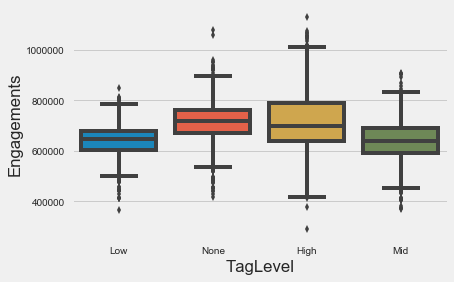

In [62]:
sns.boxplot(x = 'TagLevel', y = 'Engagements',  data = data[data['Type'] == 'Video'])

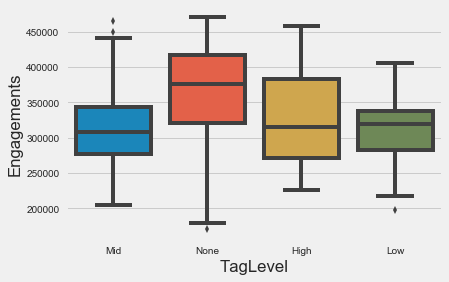

In [63]:
sns.boxplot(x = 'TagLevel', y = 'Engagements',  data = data[data['Type'] == 'Album'])

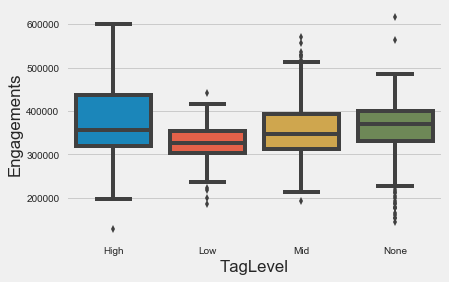

In [64]:
sns.boxplot(x = 'TagLevel', y = 'Engagements',  data = data[data['Type'] == 'Photo'])

In [65]:
data['Engagements'].mean()

592312.9034251868

Below I will try to classify the data between player and team tags. From which we will hopefully one hot encode them. 

In [66]:
teams = ['@nuggets ','@spurs ', '@okcthunder ', '@pelicansnba ','@dallasmavs ', '@trailblazers ', '@utahjazz ',
        '@bucks ', '@sixers ','@raptors ','@laclippers ', '@miamiheat ', '@pacers ', '@houstonrockets ',
        '@timberwolves ', '@cavs ', '@warriors ','@celtics ','@lakers ','@sacramentokings ', '@orlandomagic ', '@detroitpistons ',
         '@brooklynnets ','@atlhawks ', '@memgrizz ', '@suns ', '@hornets ', '@washwizards ', '@nyknicks ', '@chicagobulls '
        ]
len(teams)== len(set(teams))

True

In [67]:
def teamTagged(lst): 
    for tag in lst: 
        if tag in teams: 
            return 1 
    return 0 

In [68]:
data['teamTagged']= data.shoutouts.map(lambda a: teamTagged(a))

In [69]:
data.head()

,Engagements,NBA_Follower_Count,Created,Type,Description,Len_Desc,Tagged_Count,DayOfWeek,playOffDate,month,hour,timeOfDay,propOfSpecialTexts,shoutouts,TagLevel,teamTagged
0,502093,36984682,2019-05-22 03:30:51,Video,The @raptors bench trio of @sergeibaka @norman...,95,4,Wednesday,1,5,3,Night,0.266667,"[@raptors, @sergeibaka, @normanpowell4, @fredv...",Low,0
1,603380,36984682,2019-05-22 02:53:33,Video,@kyle_lowry7 pulls from deep for the @raptors ...,64,2,Wednesday,1,5,2,Night,0.166667,"[@kyle_lowry7, @raptors]",Low,0
2,603380,36984682,2019-05-22 02:19:58,Video,@k_mid22 with some english on the @bucks dime!,46,2,Wednesday,1,5,2,Night,0.250000,"[@k_mid22, @bucks]",Low,0
3,725100,36984682,2019-05-22 02:02:41,Video,Kawhi punches it home with the left on TNT!,43,0,Wednesday,1,5,2,Night,0.000000,[],None,0
4,661446,36984682,2019-05-22 00:47:49,Video,@giannis_an34 goes baseline early to rock the ...,57,1,Wednesday,1,5,0,Night,0.100000,[@giannis_an34],High,0


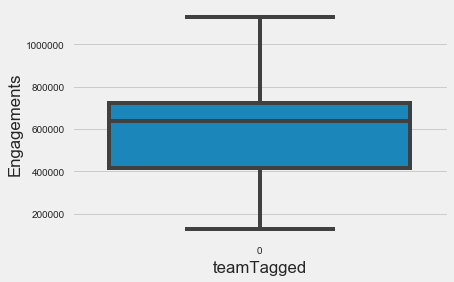

In [70]:
sns.boxplot(x = 'teamTagged', y = 'Engagements',  data = data)

In [71]:
def otherTagged(lst): 
    for tag in lst: 
        if tag not in teams: 
            return 1 
    return 0 

data['otherTagged']= data.shoutouts.map(lambda a: otherTagged(a))

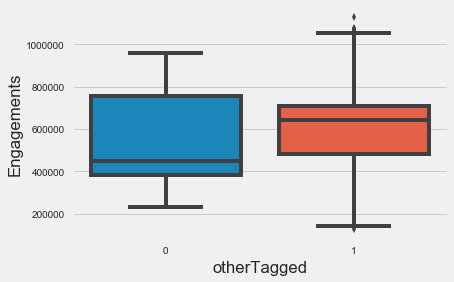

In [72]:
sns.boxplot(x = 'otherTagged', y = 'Engagements',  data = data)

In [73]:
top3 = ['@kyrieirving ','@kingjames ', '@stephencurry30 ']
bottom3 = ['@nuggets ','@spurs ','@okcthunder ' ]

def top3Tagged(lst): 
    for tag in lst: 
        if tag in top3: 
            return 1 
    return 0 

data['top3Tagged']= data.shoutouts.map(lambda a: top3Tagged(a))

def bottom3Tagged(lst): 
    for tag in lst: 
        if tag in bottom3: 
            return 1 
    return 0 

data['bottom3Tagged']= data.shoutouts.map(lambda a: bottom3Tagged(a))

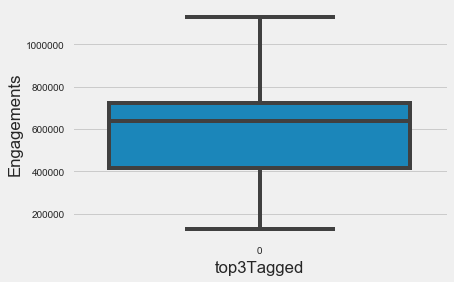

In [74]:
sns.boxplot(x = 'top3Tagged', y = 'Engagements',  data = data)

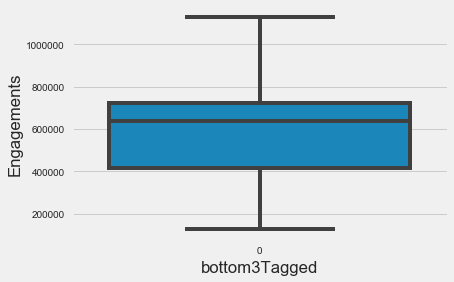

In [75]:
sns.boxplot(x = 'bottom3Tagged', y = 'Engagements',  data = data)

In [76]:
data['hashtags']= data.Description.map(lambda x: re.findall('#\w*', x))
data.head()

,Engagements,NBA_Follower_Count,Created,Type,Description,Len_Desc,Tagged_Count,DayOfWeek,playOffDate,month,hour,timeOfDay,propOfSpecialTexts,shoutouts,TagLevel,teamTagged,otherTagged,top3Tagged,bottom3Tagged,hashtags
0,502093,36984682,2019-05-22 03:30:51,Video,The @raptors bench trio of @sergeibaka @norman...,95,4,Wednesday,1,5,3,Night,0.266667,"[@raptors, @sergeibaka, @normanpowell4, @fredv...",Low,0,1,0,0,[]
1,603380,36984682,2019-05-22 02:53:33,Video,@kyle_lowry7 pulls from deep for the @raptors ...,64,2,Wednesday,1,5,2,Night,0.166667,"[@kyle_lowry7, @raptors]",Low,0,1,0,0,[]
2,603380,36984682,2019-05-22 02:19:58,Video,@k_mid22 with some english on the @bucks dime!,46,2,Wednesday,1,5,2,Night,0.250000,"[@k_mid22, @bucks]",Low,0,1,0,0,[]
3,725100,36984682,2019-05-22 02:02:41,Video,Kawhi punches it home with the left on TNT!,43,0,Wednesday,1,5,2,Night,0.000000,[],None,0,0,0,0,[]
4,661446,36984682,2019-05-22 00:47:49,Video,@giannis_an34 goes baseline early to rock the ...,57,1,Wednesday,1,5,0,Night,0.100000,[@giannis_an34],High,0,1,0,0,[]


In [77]:
allVals = {}
for listItem in data['hashtags']:
    for item in listItem:
        if item not in allVals: allVals[item] = 0
        allVals[item] = allVals[item] + 1
allVals

{'#NBAFinals': 159,
 '#GatoradeZero': 1,
 '#NBAPlayoffs': 593,
 '#TripleDoubleAlert': 111,
 '#PowerbeatsPro': 2,
 '#LegendaryMoments': 13,
 '#NBABreakdown': 152,
 '#NBAAwards': 37,
 '#NBACombine': 8,
 '#NBAPlaymakers': 3,
 '#PhantomCam': 119,
 '#MtnDew3PT': 9,
 '#TissotBuzzerBeater': 40,
 '#ThisIsYourTime': 68,
 '#NBADraftLottery': 4,
 '#NBAKicks': 74,
 '#StateFarmAssists': 26,
 '#EliteCamp': 1,
 '#NBAonABC': 267,
 '#NBACelebRow': 12,
 '#HeretoCreate': 2,
 '#NBABDAY': 88,
 '#NationalSuperHeroDay': 1,
 '#BecauseSneakers': 5,
 '#GameChangers': 8,
 '#ThisIsyourTime': 1,
 '#nbabreakdown': 1,
 '#BudweiserLegendaryMoments': 8,
 '#NBAGLeague': 5,
 '#GLeagueFinals': 9,
 '#Mobil1Blocks': 4,
 '#NBARooks': 68,
 '#KiaROTM': 19,
 '#KiaPOTM': 20,
 '#WNBADraft': 3,
 '#OneLastDance': 72,
 '#WadeCounty': 2,
 '#L3GACY': 5,
 '#ThankyouChanning': 1,
 '#LeanInTogether': 2,
 '#Curry6': 2,
 '#WeBelieve': 1,
 '#ThankYouChanning': 1,
 '#2WayPlayer': 6,
 '#19HoopClass': 1,
 '#MTNDEWICERisingStars': 24,
 '#NBAGa

In [78]:
mostCommon = set()
for item in allVals:
    if allVals[item] > 30:
        mostCommon.add(item)
mostCommon

{'#BESTofNBA',
 '#KiaTipOff17',
 '#KiaTipOff18',
 '#NBAAllStar',
 '#NBAAwards',
 '#NBABDAY',
 '#NBABreakdown',
 '#NBAChinaGames',
 '#NBADraft',
 '#NBAFinals',
 '#NBAKicks',
 '#NBAMediaDay',
 '#NBAPlayoffs',
 '#NBAPreseason',
 '#NBARooks',
 '#NBASummer',
 '#NBAXmas',
 '#NBAonABC',
 '#OneLastDance',
 '#PhantomCam',
 '#ThisIsWhyWePlay',
 '#ThisIsYourTime',
 '#TissotBuzzerBeater',
 '#TripleDoubleAlert',
 '#nbapreseason'}

In [79]:
avgEng = {}
for listItem in mostCommon:
    temp = 0
    count = 0
    for index, row in data.iterrows():
        if listItem in row["hashtags"]:
            temp = temp + row["Engagements"]
            count = count + 1
    avgEng[listItem] = temp / count
avgEng

{'#BESTofNBA': 712296.8431372549,
 '#KiaTipOff18': 673357.3142857143,
 '#TripleDoubleAlert': 363438.4864864865,
 '#NBAChinaGames': 570793.5454545454,
 '#TissotBuzzerBeater': 491971.925,
 '#nbapreseason': 721098.75,
 '#NBAPreseason': 652239.1146496815,
 '#ThisIsWhyWePlay': 562787.9162790697,
 '#NBAKicks': 491119.4324324324,
 '#NBARooks': 494184.1176470588,
 '#NBASummer': 436092.0416666667,
 '#NBAAllStar': 565353.3384615384,
 '#NBADraft': 470413.5142857143,
 '#NBABDAY': 408676.11363636365,
 '#NBAonABC': 654759.1797752809,
 '#ThisIsYourTime': 537557.2352941176,
 '#NBAAwards': 438375.5675675676,
 '#NBAPlayoffs': 517845.85908319184,
 '#NBAXmas': 595405.2428571428,
 '#KiaTipOff17': 679942.2121212122,
 '#NBABreakdown': 619415.6315789474,
 '#NBAFinals': 561512.6624203821,
 '#OneLastDance': 606982.3333333334,
 '#PhantomCam': 645666.6722689075,
 '#NBAMediaDay': 371085.625}

In [80]:
temp = 0
count = 0
for index, row in data.iterrows():
    if row['hashtags'] != []:
        temp = temp + row["Engagements"]
        count = count + 1
print(temp / count)

564144.9185423366


In [81]:
data['hasHashtag']=data.hashtags.map(lambda x: x != [])

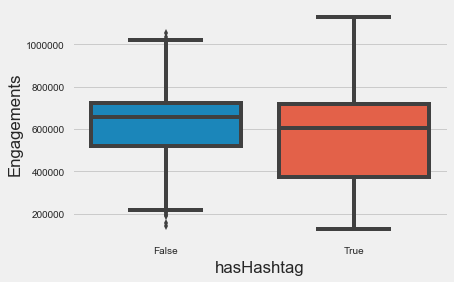

In [82]:
sns.boxplot(x = 'hasHashtag', y = 'Engagements',  data = data)

In [83]:
def HashLevel(hashs):
    highest = 0
    for octothorp in hashs:
        if octothorp in avgEng and avgEng[octothorp] > highest:
            highest = avgEng[octothorp]
    if highest == 0:
        return 'None'
    elif highest < 500000:
        return 'Low'
    elif highest < 600000:
        return 'Mid'
    else:
        return 'High'

In [84]:
data['HashLevel'] = data.hashtags.map(lambda a: HashLevel(a))
data.head()

,Engagements,NBA_Follower_Count,Created,Type,Description,Len_Desc,Tagged_Count,DayOfWeek,playOffDate,month,...,propOfSpecialTexts,shoutouts,TagLevel,teamTagged,otherTagged,top3Tagged,bottom3Tagged,hashtags,hasHashtag,HashLevel
0,502093,36984682,2019-05-22 03:30:51,Video,The @raptors bench trio of @sergeibaka @norman...,95,4,Wednesday,1,5,...,0.266667,"[@raptors, @sergeibaka, @normanpowell4, @fredv...",Low,0,1,0,0,[],False,None
1,603380,36984682,2019-05-22 02:53:33,Video,@kyle_lowry7 pulls from deep for the @raptors ...,64,2,Wednesday,1,5,...,0.166667,"[@kyle_lowry7, @raptors]",Low,0,1,0,0,[],False,None
2,603380,36984682,2019-05-22 02:19:58,Video,@k_mid22 with some english on the @bucks dime!,46,2,Wednesday,1,5,...,0.250000,"[@k_mid22, @bucks]",Low,0,1,0,0,[],False,None
3,725100,36984682,2019-05-22 02:02:41,Video,Kawhi punches it home with the left on TNT!,43,0,Wednesday,1,5,...,0.000000,[],None,0,0,0,0,[],False,None
4,661446,36984682,2019-05-22 00:47:49,Video,@giannis_an34 goes baseline early to rock the ...,57,1,Wednesday,1,5,...,0.100000,[@giannis_an34],High,0,1,0,0,[],False,None


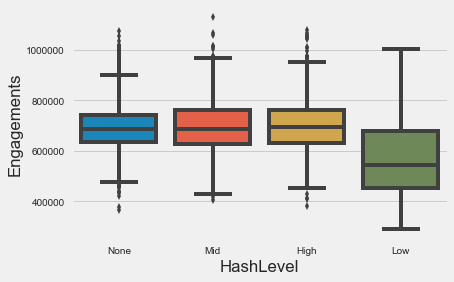

In [85]:
sns.boxplot(x = 'HashLevel', y = 'Engagements',  data = data[data['Type'] == 'Video'])

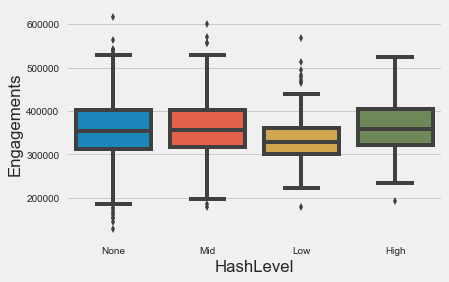

In [86]:
sns.boxplot(x = 'HashLevel', y = 'Engagements',  data = data[data['Type'] != 'Video'])

In [87]:
data["Engagements"].mean()

592312.9034251868

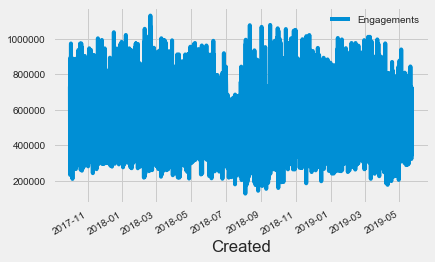

In [88]:
data.plot.line(x="Created", y="Engagements")

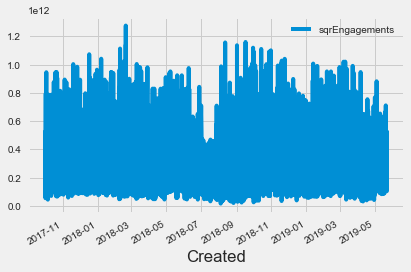

In [89]:
data['sqrEngagements']= data.Engagements.map(lambda x: x * x)
data.plot.line(x="Created", y="sqrEngagements")

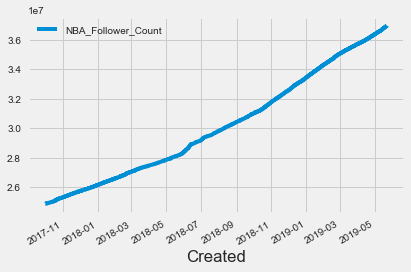

In [90]:
data.plot.line(x="Created", y="NBA_Follower_Count")

Huge multicollinearity issues here

## Feature Creation of Count of Number of Posts per Day##

In [91]:
data['monthDateYear']= data.Created.map(lambda x: x.strftime('%Y-%m-%d'))

In [92]:
data.groupby(['monthDateYear']).size()

monthDateYear
2017-10-01     5
2017-10-02     6
2017-10-03    14
2017-10-04    15
2017-10-05    15
2017-10-06     3
2017-10-07    10
2017-10-08    11
2017-10-09     4
2017-10-10     7
2017-10-11     8
2017-10-12     4
2017-10-13     8
2017-10-14     4
2017-10-15     4
2017-10-16     4
2017-10-17    11
2017-10-18    22
2017-10-19    15
2017-10-20    21
2017-10-21    15
2017-10-22    10
2017-10-23    12
2017-10-24     5
2017-10-25    11
2017-10-26    17
2017-10-27    14
2017-10-28    10
2017-10-29    13
2017-10-30     6
              ..
2019-04-23    13
2019-04-24    23
2019-04-25    13
2019-04-26     8
2019-04-27    14
2019-04-28    25
2019-04-29     7
2019-04-30    16
2019-05-01    11
2019-05-02     9
2019-05-03     9
2019-05-04    23
2019-05-05    20
2019-05-06    15
2019-05-07    15
2019-05-08    12
2019-05-09    18
2019-05-10    15
2019-05-11    11
2019-05-12    15
2019-05-13    11
2019-05-14     5
2019-05-15    15
2019-05-16    15
2019-05-17    15
2019-05-18    10
2019-05-19    14


In [93]:
x =data.groupby(['monthDateYear']).size()
x= x.reset_index()
data = data.merge(x, left_on='monthDateYear', right_on='monthDateYear')
data = data.rename(columns={0: 'postsInThatDay'})

In [94]:
data.head()

,Engagements,NBA_Follower_Count,Created,Type,Description,Len_Desc,Tagged_Count,DayOfWeek,playOffDate,month,...,teamTagged,otherTagged,top3Tagged,bottom3Tagged,hashtags,hasHashtag,HashLevel,sqrEngagements,monthDateYear,postsInThatDay
0,502093,36984682,2019-05-22 03:30:51,Video,The @raptors bench trio of @sergeibaka @norman...,95,4,Wednesday,1,5,...,0,1,0,0,[],False,None,252097380649,2019-05-22,5
1,603380,36984682,2019-05-22 02:53:33,Video,@kyle_lowry7 pulls from deep for the @raptors ...,64,2,Wednesday,1,5,...,0,1,0,0,[],False,None,364067424400,2019-05-22,5
2,603380,36984682,2019-05-22 02:19:58,Video,@k_mid22 with some english on the @bucks dime!,46,2,Wednesday,1,5,...,0,1,0,0,[],False,None,364067424400,2019-05-22,5
3,725100,36984682,2019-05-22 02:02:41,Video,Kawhi punches it home with the left on TNT!,43,0,Wednesday,1,5,...,0,0,0,0,[],False,None,525770010000,2019-05-22,5
4,661446,36984682,2019-05-22 00:47:49,Video,@giannis_an34 goes baseline early to rock the ...,57,1,Wednesday,1,5,...,0,1,0,0,[],False,None,437510810916,2019-05-22,5


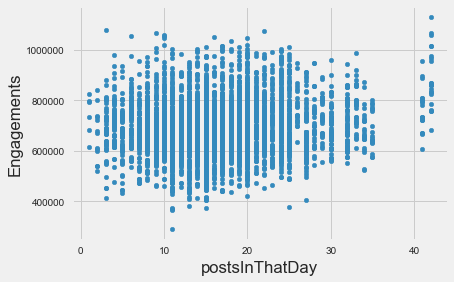

In [95]:
data[data['Type'] == 'Video'].plot.scatter(x="postsInThatDay", y="Engagements");

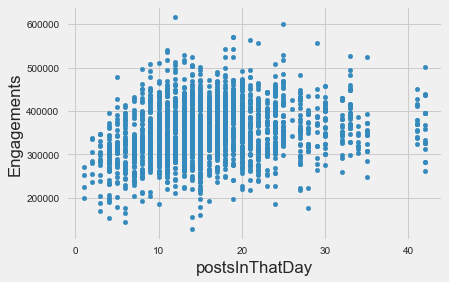

In [96]:
data[data['Type'] != 'Video'].plot.scatter(x="postsInThatDay", y="Engagements");

In [97]:
data.columns

Index(['Engagements', 'NBA_Follower_Count', 'Created', 'Type', 'Description',
       'Len_Desc', 'Tagged_Count', 'DayOfWeek', 'playOffDate', 'month', 'hour',
       'timeOfDay', 'propOfSpecialTexts', 'shoutouts', 'TagLevel',
       'teamTagged', 'otherTagged', 'top3Tagged', 'bottom3Tagged', 'hashtags',
       'hasHashtag', 'HashLevel', 'sqrEngagements', 'monthDateYear',
       'postsInThatDay'],
      dtype='object')

In [98]:
data.drop('sqrEngagements', axis=1).to_csv('esketit2.csv', index=False)

In [97]:
data['Tagged_Count^2'] = data['Tagged_Count']*data['Tagged_Count']

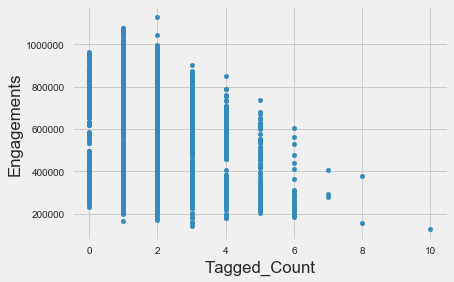

In [107]:
data.plot.scatter(x="Tagged_Count", y="Engagements")

In [99]:
import sklearn as sk
from sklearn import preprocessing

In [100]:
x =preprocessing.scale(data[['Tagged_Count^2']])

In [105]:
y = data.join(pd.DataFrame(x).rename(columns={0: 'Tagged_Count^2_standardized'}))

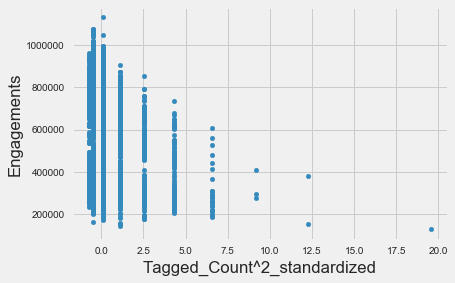

In [106]:
y.plot.scatter(x="Tagged_Count^2_standardized", y="Engagements")

In [109]:
y['log_engagements'] = np.log(y['Engagements'])

In [110]:
y['log_Tagged_Count^2']= np.log(y['Tagged_Count^2'])

/Users/frankhu/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


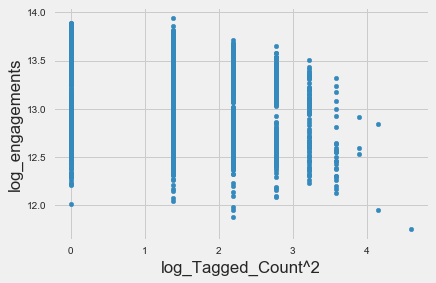

In [111]:
y.plot.scatter(x="log_Tagged_Count^2", y="log_engagements")